In [ ]:
!pip install mumin[all]==1.6.2 torchmetrics==0.7.2 --quiet
!pip install dgl-cu111==0.7.2 -f https://data.dgl.ai/wheels/repo.html --quiet

     |████████████████████████████████| 397 kB 11.2 MB/s 
     |████████████████████████████████| 211 kB 69.0 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 6.2 MB 24.8 MB/s 
     |████████████████████████████████| 4.7 MB 83.9 MB/s 
     |████████████████████████████████| 281 kB 76.5 MB/s 
     |████████████████████████████████| 93 kB 2.1 MB/s 
     |████████████████████████████████| 7.4 MB 34.6 MB/s 
     |████████████████████████████████| 81 kB 9.3 MB/s 
     |████████████████████████████████| 101 kB 11.9 MB/s 
     |████████████████████████████████| 6.6 MB 61.7 MB/s 
     |████████████████████████████████| 596 kB 87.1 MB/s 
     |████████████████████████████████| 165.0 MB 30 kB/s 


In [ ]:
from mumin import MuminDataset
from google.colab import drive
from getpass import getpass
from pathlib import Path
import shutil
import re

In [ ]:
drive_dir = Path('drive')
drive.mount(str(drive_dir.resolve()), force_remount=True)
drive_content_dir = [child for child in drive_dir.iterdir() 
                     if re.search(r'My ?Drive', str(child.stem)) is not None][0]
file = shutil.copy(drive_content_dir / 'mumin-small.zip', 'mumin-small.zip')

Mounted at /content/drive


In [ ]:
dataset = MuminDataset(file)
dataset


MuminDataset(size=small, compiled=False)

In [ ]:
drive_dir = Path('drive')
drive.mount(str(drive_dir.resolve()), force_remount=True)
drive_content_dir = [child for child in drive_dir.iterdir() 
                     if re.search(r'My ?Drive', str(child.stem)) is not None][0]
shutil.copy(drive_content_dir / 'mumin-small.zip', 'mumin-small.zip')

Mounted at /content/drive


'mumin-small.zip'

In [ ]:
dataset.compile()

2022-08-10 04:16:52,375 [INFO] Loading dataset


MuminDataset(num_nodes=392,419, num_relations=483,029, size='small', compiled=True)

In [ ]:
drive_dir = Path('drive')
drive.mount(str(drive_dir.resolve()), force_remount=True)

Mounted at /content/drive


In [ ]:
drive_content_dir = [child for child in drive_dir.iterdir() 
                     if re.search(r'My ?Drive', str(child.stem)) is not None][0]
shutil.copy('mumin-small.zip', drive_content_dir / 'mumin-small.zip')

PosixPath('drive/MyDrive/mumin-small.zip')

In [ ]:
drive_dir = Path('drive')
drive_content_dir = [child for child in drive_dir.iterdir() 
                     if re.search(r'My ?Drive', str(child.stem)) is not None][0]
drive.mount(str(drive_dir.resolve()), force_remount=True)
shutil.copy('mumin-small.zip', drive_content_dir / 'mumin-small.zip')

In [ ]:
from PIL import Image
import itertools as it

<center><img src="https://filedn.com/lRBwPhPxgV74tO0rDoe8SpH/metagraph.png" alt="meta graph of the MuMiN dataset" width="60%"/></center>

In [ ]:
list(dataset.nodes.keys())

['claim', 'tweet', 'user', 'image', 'article', 'hashtag', 'reply']

In [ ]:
from mumin import save_dgl_graph, load_dgl_graph
import dgl
import dgl.nn.pytorch as dglnn
import dgl.dataloading as D
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch
import torchmetrics as tm
import networkx as nx
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from collections import defaultdict

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


Using backend: pytorch


In [ ]:
if 'dgl_graph' not in globals():
    dgl_graph = dataset.to_dgl()
dgl_graph

2022-08-10 04:17:11,099 [INFO] Outputting to DGL


Graph(num_nodes={'article': 1497, 'claim': 2127, 'hashtag': 28820, 'image': 1036, 'reply': 186602, 'tweet': 4178, 'user': 158995},
      num_edges={('article', 'has_article_inv', 'tweet'): 1969, ('claim', 'discusses_inv', 'tweet'): 4890, ('hashtag', 'has_hashtag_inv', 'tweet'): 2343, ('hashtag', 'has_hashtag_inv', 'user'): 52420, ('image', 'has_image_inv', 'tweet'): 1045, ('reply', 'posted_inv', 'user'): 186602, ('reply', 'quote_of', 'tweet'): 93926, ('reply', 'reply_to', 'tweet'): 84271, ('tweet', 'discusses', 'claim'): 4890, ('tweet', 'has_article', 'article'): 1969, ('tweet', 'has_hashtag', 'hashtag'): 2343, ('tweet', 'has_image', 'image'): 1045, ('tweet', 'mentions', 'user'): 1134, ('tweet', 'posted_inv', 'user'): 4178, ('tweet', 'quote_of_inv', 'reply'): 93926, ('tweet', 'reply_to_inv', 'reply'): 84271, ('tweet', 'retweeted_inv', 'user'): 13710, ('user', 'follows', 'user'): 19886, ('user', 'follows_inv', 'user'): 19886, ('user', 'has_hashtag', 'hashtag'): 52420, ('user', 'mentions

In [ ]:
print('Node types in the DGL graph:')
print(dgl_graph.ntypes)
print('\nRelation types in the DGL graph:')
dgl_graph.canonical_etypes

Node types in the DGL graph:
['article', 'claim', 'hashtag', 'image', 'reply', 'tweet', 'user']

Relation types in the DGL graph:


[('article', 'has_article_inv', 'tweet'),
 ('claim', 'discusses_inv', 'tweet'),
 ('hashtag', 'has_hashtag_inv', 'tweet'),
 ('hashtag', 'has_hashtag_inv', 'user'),
 ('image', 'has_image_inv', 'tweet'),
 ('reply', 'posted_inv', 'user'),
 ('reply', 'quote_of', 'tweet'),
 ('reply', 'reply_to', 'tweet'),
 ('tweet', 'discusses', 'claim'),
 ('tweet', 'has_article', 'article'),
 ('tweet', 'has_hashtag', 'hashtag'),
 ('tweet', 'has_image', 'image'),
 ('tweet', 'mentions', 'user'),
 ('tweet', 'posted_inv', 'user'),
 ('tweet', 'quote_of_inv', 'reply'),
 ('tweet', 'reply_to_inv', 'reply'),
 ('tweet', 'retweeted_inv', 'user'),
 ('user', 'follows', 'user'),
 ('user', 'follows_inv', 'user'),
 ('user', 'has_hashtag', 'hashtag'),
 ('user', 'mentions', 'user'),
 ('user', 'mentions_inv', 'tweet'),
 ('user', 'mentions_inv', 'user'),
 ('user', 'posted', 'reply'),
 ('user', 'posted', 'tweet'),
 ('user', 'retweeted', 'tweet')]

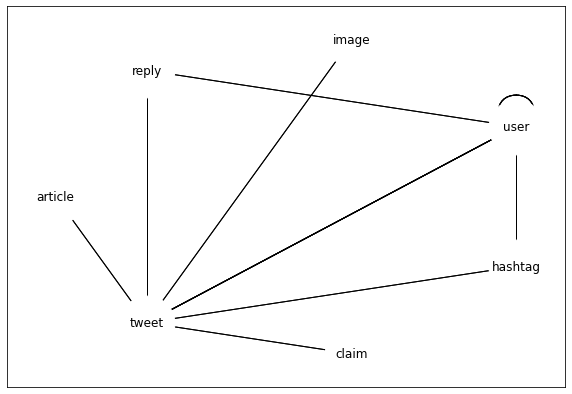

In [ ]:
plt.figure(figsize=(10, 7))
metagraph = dgl_graph.metagraph()
nx.draw_networkx(metagraph, 
                 pos=nx.shell_layout(metagraph), 
                 node_color='white', 
                 node_size=3000,
                 arrows=False)

In [ ]:
rel = ('user', 'posted', 'tweet')
posted_subgraph = dgl.edge_type_subgraph(dgl_graph, etypes=[rel]).to('cuda')
posted_subgraph

NameError: ignored

In [ ]:
rel = ('user', 'posted', 'tweet')
subgraph = dgl.edge_type_subgraph(dgl_graph, etypes=[rel]).to('cuda')
subgraph

Graph(num_nodes={'tweet': 4178, 'user': 158995},
      num_edges={('user', 'posted', 'tweet'): 4178},
      metagraph=[('user', 'tweet', 'posted')])

In [ ]:
train_mask = subgraph.nodes['tweet'].data['train_mask']
val_mask = subgraph.nodes['tweet'].data['val_mask']
test_mask = subgraph.nodes['tweet'].data['test_mask']

In [ ]:
class SAGEClassifier(nn.Module):
    def __init__(self, hidden_dim: int = 500):
        super().__init__()
        feats1 = subgraph.nodes[rel[0]].data['feat'].shape[-1]
        feats2 = subgraph.nodes[rel[2]].data['feat'].shape[-1]
        self.conv = dglnn.SAGEConv(in_feats=(feats1, feats2), 
                                   out_feats=hidden_dim, 
                                   aggregator_type='lstm',
                                   activation=nn.GELU())
        self.clf = nn.Sequential(
            nn.Dropout(0.2),
            nn.BatchNorm1d(hidden_dim),
            nn.Linear(hidden_dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(0.2),
            nn.BatchNorm1d(hidden_dim),
            nn.Linear(hidden_dim, 1)
        )


    def forward(self, graph, x):
        x = self.conv(graph, (x['user'], x['tweet']))
        x = self.clf(x)
        return x

gnn = SAGEClassifier().cuda()
gnn

SAGEClassifier(
  (conv): SAGEConv(
    (feat_drop): Dropout(p=0.0, inplace=False)
    (activation): GELU(approximate=none)
    (lstm): LSTM(774, 774, batch_first=True)
    (fc_self): Linear(in_features=812, out_features=500, bias=False)
    (fc_neigh): Linear(in_features=774, out_features=500, bias=False)
  )
  (clf): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): GELU(approximate=none)
    (4): Dropout(p=0.2, inplace=False)
    (5): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=500, out_features=1, bias=True)
  )
)

In [ ]:
def forward_pass() -> dict:
    '''A forward pass of the graph neural network.

    Returns:
        dict:
            A dict with keys 'loss', 'misinformation_f1' and 'factual_f1', 
            with values as their corresponding values.
    '''
    # Set the GNN to training mode
    gnn.train()

    # Get the input features and the output labels
    input_feats = dict(
        p1=subgraph.nodes[rel[0]].data['feat'].float().cuda(),
        p2=subgraph.nodes[rel[2]].data['feat'].float().cuda()
    )
    output_labels = subgraph.nodes['tweet'].data['label'].cuda()

    # Forward propagation
    logits = gnn(subgraph, input_feats).squeeze()

    # Compute loss
    loss = F.binary_cross_entropy_with_logits(
        input=logits[train_mask],
        target=output_labels.float()[train_mask]
    )

    # Compute training metrics
    scores = scorer(logits[train_mask].ge(0), output_labels[train_mask])
    misinformation_f1 = scores[0]
    factual_f1 = scores[1]

    return dict(loss=loss, 
                misinformation_f1=misinformation_f1, 
                factual_f1=factual_f1)

In [ ]:
def evaluate(split: str) -> dict:
    '''Evaluate the graph neural network.

    Args:
        split (str):
            The split to evaluate the GNN on. Can be 'val' or 'test'.

    Returns:
        dict:
            A dict with keys 'loss', 'misinformation_f1' and 'factual_f1', 
            with values as their corresponding values.
    '''
    # Get the correct mask, depending on the value of `split`
    mask = val_mask if split == 'val' else test_mask

    gnn.eval()
    with torch.no_grad():

        # Get the input features and the output labels
        input_feats = dict(
        p1=subgraph.nodes[rel[0]].data['feat'].float().cuda(),
        p2=subgraph.nodes[rel[2]].data['feat'].float().cuda()
        )
        output_labels = subgraph.nodes['tweet'].data['label'].cuda()

        # Forward propagation
        logits = gnn(subgraph, input_feats).squeeze()

        # Compute validation loss
        val_loss = F.binary_cross_entropy_with_logits(
            input=logits[mask],
            target=output_labels.float()[mask]
        ).cpu().item()

        # Compute validation metrics
        scores = scorer(logits[mask].ge(0), output_labels[mask])
        val_misinformation_f1 = scores[0].cpu().item()
        val_factual_f1 = scores[1].cpu().item()

    return dict(loss=val_loss, 
                misinformation_f1=val_misinformation_f1, 
                factual_f1=val_factual_f1)

In [ ]:
import numpy as np

In [ ]:
# Initialise optimiser
opt = optim.AdamW(gnn.parameters(), lr=3e-4)

# Initialise scorer
scorer = tm.classification.f_beta.F1Score(num_classes=2, average='none').cuda()

# Initialise dictionary containing validation scores
val_scores = defaultdict(list)

# Initialise progress bar
epoch_pbar = tqdm(range(1000), desc='Training')

for epoch in epoch_pbar:

    # Reset the gradients
    opt.zero_grad()

    # Forward propagation
    train_results = forward_pass()

    # Backward propagation
    train_results['loss'].backward()

    # Update gradients
    opt.step()

    # Evaluate the model
    val_results = evaluate('val')

    # Store the validation scores
    for metric in ['loss', 'misinformation_f1', 'factual_f1']:
        val_scores[metric].append(val_results[metric])

    # Update progress bar description
    if epoch % 25 == 0 and epoch > 0:
        val_loss = np.mean(val_scores['loss'])
        val_misinformation_f1 = np.mean(val_scores['misinformation_f1'])
        val_factual_f1 = np.mean(val_scores['factual_f1'])
        desc = (f'Training - '
                f'loss {train_results["loss"]:.3f} - '
                f'factual_f1 {train_results["factual_f1"]:.3f} - '
                f'misinfo_f1 {train_results["misinformation_f1"]:.3f} - '
                f'val_loss {val_loss:.3f} - '
                f'val_factual_f1 {val_factual_f1:.3f} - '
                f'val_misinfo_f1 {val_misinformation_f1:.3f}')
        epoch_pbar.set_description(desc)
        val_scores = defaultdict(list)

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

KeyError: ignored

In [ ]:
test_results = evaluate('test')
macro_f1 = np.mean([test_results['factual_f1'],
                    test_results['misinformation_f1']])
print('*** Test results ***')
print(f'Factual F1: {test_results["factual_f1"]:.4f}')
print(f'Misinformation F1: {test_results["misinformation_f1"]:.4f}')
print(f'Macro-average F1: {macro_f1:.4f}')